<a href="https://colab.research.google.com/github/Sudhakhar-Katta/SpamFilter-NLP-Project/blob/main/SpamFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,accuracy_score

df= pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
columns_to_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
existing_cols_to_drop=[col for col in columns_to_drop if col in df.columns]
df=df.drop(columns=existing_cols_to_drop)

df.columns=['label','text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stopwords=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [ ]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [ ]:
def preprocces(text):
  text=text.lower()
  text=re.sub(r'[^w\s]','',text)
  tokens=word_tokenize(text)
  filtered_tokens=[]
  for t in tokens:
    if t not in stopwords:
      filtered_tokens.append(t)
  tokens=filtered_tokens
  pos_tag_result = nltk.pos_tag(tokens)
  lemmatize=[lemmatizer.lemmatize(word,get_wordnet_pos(tag)) for word,tag in pos_tag_result]
  return ' '.join(lemmatize)

In [ ]:
df['clean text']=df['text'].apply(preprocces)

In [ ]:
df.tail()

,label,text,clean text
5567,spam,This is the 2nd time we have tried 2 contact u...,w w w
5568,ham,Will Ì_ b going to esplanade fr home?,w
5569,ham,"Pity, * was in mood for that. So...any other s...",w
5570,ham,The guy did some bitching but I acted like i'd...,w
5571,ham,Rofl. Its true to its name,


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.48).astype(int)
y_pred = ['ham' if p == 0 else 'spam' for p in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.91      0.91      0.91       149

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



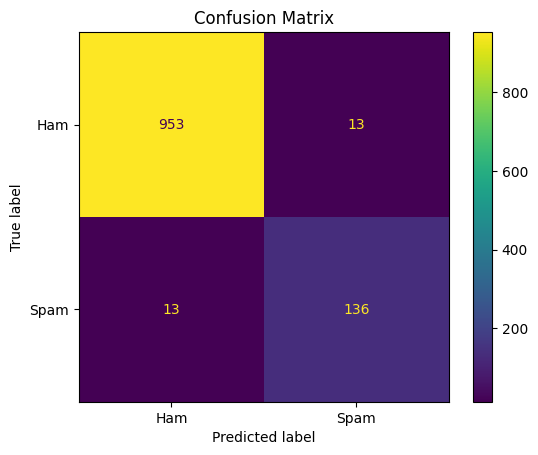

In [ ]:

# 9. CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap='viridis')
plt.title(f"Confusion Matrix")
plt.show()